In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math 



In [69]:
# local path to data
data_claims_p = '../data/claims_data.csv'
data_final_p = '../data/final/'

# sharepoint path to data
# import requests
# username = 'your_username'
# password = 'your_password'

# data_final_sp = 'https://standardbank.sharepoint.com/:f:/r/sites/DataHackathonSU/Shared%20Documents/telematics_data?csf=1&web=1&e=lLK83c'
# data_claims_sp = 'https://standardbank.sharepoint.com/:x:/r/sites/DataHackathonSU/Shared%20Documents/claims_data.csv?d=wd7ea2811007641e8b1336c81e15e895f&csf=1&web=1&e=JDSqqP'

# data_claims = requests.get(data_claims_sp)#, auth=(username, password))
# print(data_claims)

In [70]:
data_claims = pd.read_csv(data_claims_p)
print("Size & Shape: ", data_claims.size, data_claims.shape )
print("\nHead: ", data_claims.head())
print("\n dTypes: ", data_claims.dtypes)

Size & Shape:  327 (109, 3)

Head:     vehicleid  number of claims  total claims cost
0   92624443                 6          389723.07
1   87055861                 3          209466.98
2  111082600                 3           76122.98
3   96215479                 2           56622.41
4  104804470                 2          206623.44

 dTypes:  vehicleid              int64
number of claims       int64
total claims cost    float64
dtype: object


In [71]:
no_claims = data_claims['total claims cost'].isnull().sum() # no of vehicles with no claims cost out of 109. 
print("Percentage of vehicles with no claims cost: ", no_claims/109*100, "% ", no_claims, "vehicles")

Percentage of vehicles with no claims cost:  77.06422018348624 %  84 vehicles


(array([1., 1., 0., 3., 2., 1., 4., 0., 1., 1., 4., 0., 0., 0., 0., 0., 0.,
        0., 2., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1.]),
 array([  7153.    ,  17237.1435,  27321.287 ,  37405.4305,  47489.574 ,
         57573.7175,  67657.861 ,  77742.0045,  87826.148 ,  97910.2915,
        107994.435 , 118078.5785, 128162.722 , 138246.8655, 148331.009 ,
        158415.1525, 168499.296 , 178583.4395, 188667.583 , 198751.7265,
        208835.87  , 218920.0135, 229004.157 , 239088.3005, 249172.444 ,
        259256.5875, 269340.731 , 279424.8745, 289509.018 , 299593.1615,
        309677.305 , 319761.4485, 329845.592 , 339929.7355, 350013.879 ,
        360098.0225, 370182.166 , 380266.3095, 390350.453 , 400434.5965,
        410518.74  ]),
 <BarContainer object of 40 artists>)

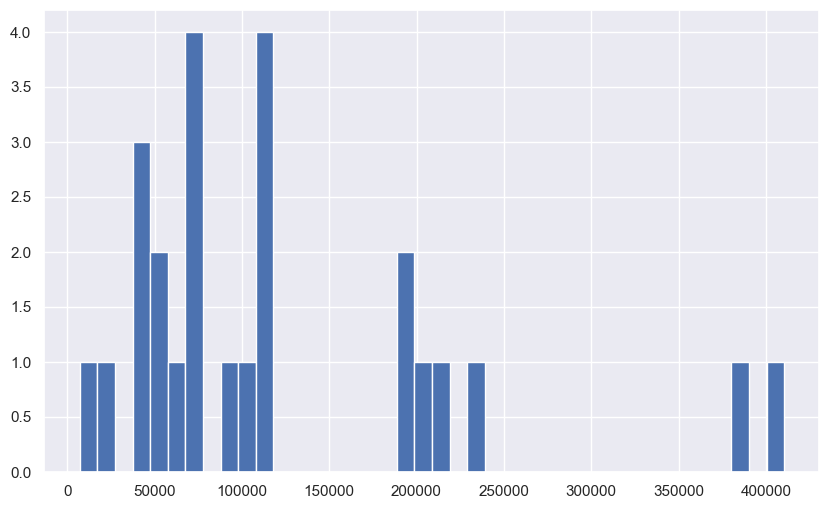

In [72]:
plt.hist(data_claims['total claims cost'], bins=40)

(array([1., 0., 0., 1., 2., 1., 0., 2., 1., 0., 0., 1., 1., 0., 2., 2., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 2., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  7153.    ,  11186.6574,  15220.3148,  19253.9722,  23287.6296,
         27321.287 ,  31354.9444,  35388.6018,  39422.2592,  43455.9166,
         47489.574 ,  51523.2314,  55556.8888,  59590.5462,  63624.2036,
         67657.861 ,  71691.5184,  75725.1758,  79758.8332,  83792.4906,
         87826.148 ,  91859.8054,  95893.4628,  99927.1202, 103960.7776,
        107994.435 , 112028.0924, 116061.7498, 120095.4072, 124129.0646,
        128162.722 , 132196.3794, 136230.0368, 140263.6942, 144297.3516,
        148331.009 , 152364.6664, 15639

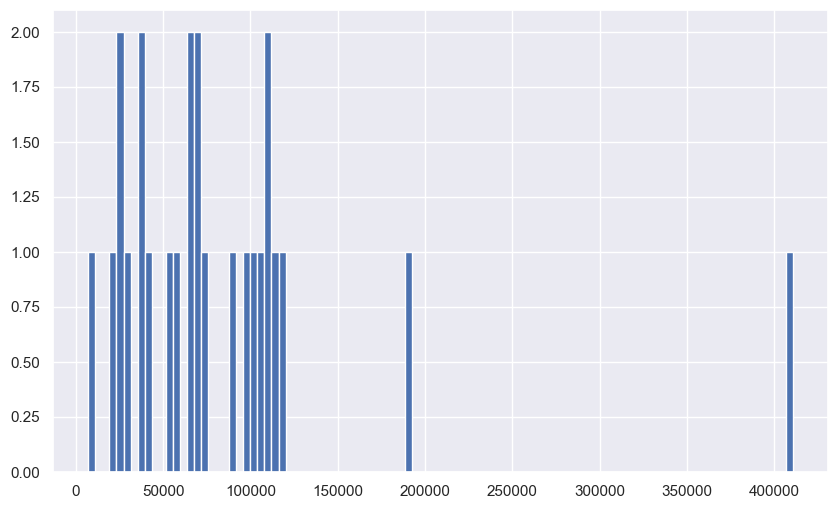

In [73]:

average_cost_per_claim = data_claims["total claims cost"] / data_claims["number of claims"]
#print(average_cost_per_claim)

plt.hist(average_cost_per_claim, bins=100)

In [74]:
data_claims['average_per_claim'] = average_cost_per_claim; 
print(data_claims.head())
data_claims.shape

   vehicleid  number of claims  total claims cost  average_per_claim
0   92624443                 6          389723.07       64953.845000
1   87055861                 3          209466.98       69822.326667
2  111082600                 3           76122.98       25374.326667
3   96215479                 2           56622.41       28311.205000
4  104804470                 2          206623.44      103311.720000


(109, 4)

In [75]:
vehicleid = data_claims["vehicleid"]
print("Vehicle (all / uniques): ", vehicleid.size, vehicleid.unique().size)
vehicleid.head()

Vehicle (all / uniques):  109 109


0     92624443
1     87055861
2    111082600
3     96215479
4    104804470
Name: vehicleid, dtype: int64

In [76]:
car_data = []
for x in vehicleid:
    try:
        car_data.append(pd.read_csv(f"{data_final_p}{x}.csv"))
    except:
        car_data.append(pd.DataFrame())
        print(f"No file for : {x}.csv")
print(len(car_data))
car_data[0].info()

No file for : 98951195.csv
No file for : 140259212.csv
No file for : 257728155.csv
109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   partition_date        82014 non-null  object 
 1   id                    82014 non-null  int64  
 2   vehicleid             82014 non-null  int64  
 3   coordinate_latitude   82014 non-null  float64
 4   coordinate_longitude  82014 non-null  float64
 5   timestamp             82014 non-null  object 
 6   heading               82014 non-null  int64  
 7   ignitionState         82014 non-null  object 
 8   odometer              82014 non-null  float64
 9   speed                 82014 non-null  int64  
 10  vext                  82014 non-null  float64
 11  event_description     82014 non-null  object 
 12  linear_g              82014 non-null  float64
 13  lateral_g             82014 non-nu

In [77]:
data_claims.shape
data_claims.head(110)

,vehicleid,number of claims,total claims cost,average_per_claim
0,92624443,6,389723.07,64953.845000
1,87055861,3,209466.98,69822.326667
2,111082600,3,76122.98,25374.326667
3,96215479,2,56622.41,28311.205000
4,104804470,2,206623.44,103311.720000
...,...,...,...,...
104,212597073,0,NaN,NaN
105,219532871,0,NaN,NaN
106,247281483,0,NaN,NaN
107,251871348,0,NaN,NaN


In [86]:
avg = []
avgZero = []
avgDiff = []
for i in range(0, len(car_data)):#len(vehicleid)):
    #print(car_data[i])
    try: 
        t = car_data[i]
        avg.append(t["speed"].mean())
        avgZero.append(t[t["speed"] != 0]["speed"].mean())
        avgDiff.append((t['speed'] - t['road_speed']).mean())
    except:
        avg.append(0)
        avgZero.append(0)
        avgDiff.append(0)
        #
    
#print(t["speed"].mean())
data_claims["avg_speed"] = avg[0:109]
data_claims["avg_speed_nonzero"] = avgZero[0:109]
data_claims["avg_speed_diff"] = avgDiff[0:109]
print(data_claims.head(100))

    vehicleid  number of claims  total claims cost  average_per_claim  \
0    92624443                 6          389723.07       64953.845000   
1    87055861                 3          209466.98       69822.326667   
2   111082600                 3           76122.98       25374.326667   
3    96215479                 2           56622.41       28311.205000   
4   104804470                 2          206623.44      103311.720000   
..        ...               ...                ...                ...   
95  176358659                 0                NaN                NaN   
96  176493415                 0                NaN                NaN   
97  176495073                 0                NaN                NaN   
98  176668759                 0                NaN                NaN   
99  176909807                 0                NaN                NaN   

    avg_speed  avg_speed_nonzero  avg_speed_diff  
0   24.943729          39.320641      -38.964825  
1   25.174561        

10.660808729039154


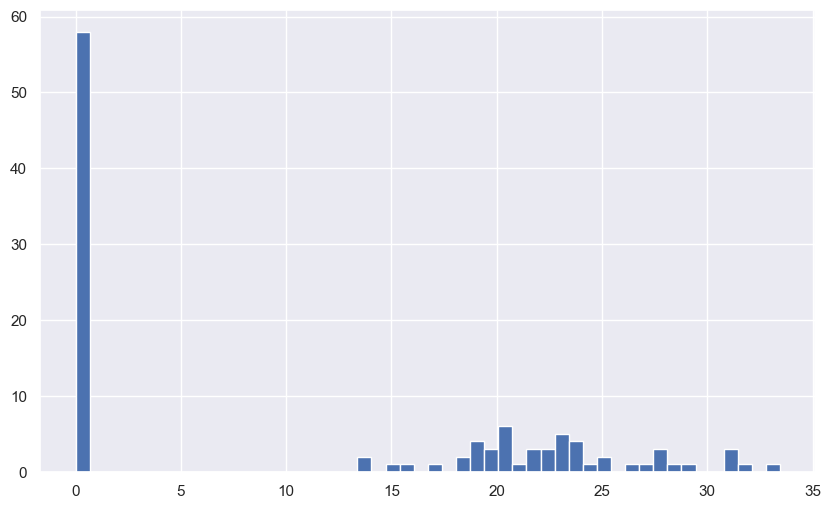

In [84]:
plt.hist(data_claims.avg_speed, bins=50)
print(data_claims.avg_speed.mean())

21.473780939185


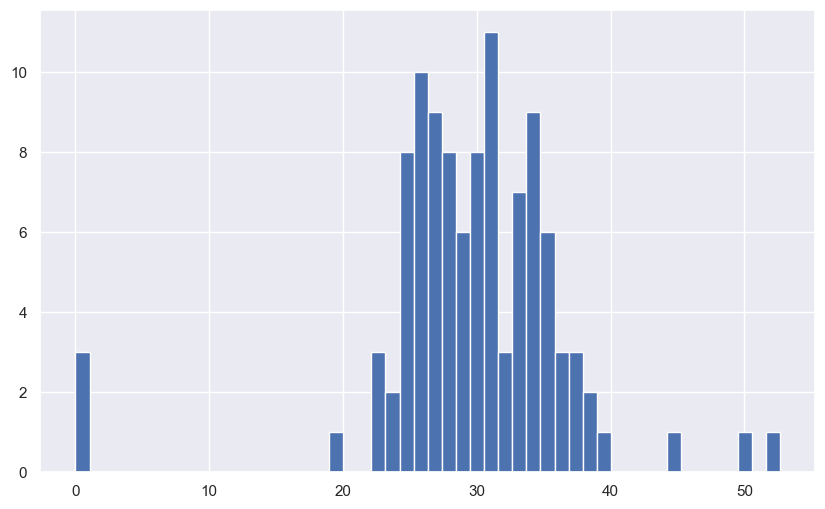

In [110]:
plt.hist(data_claims['avg_speed_nonzero'], bins=50)
print(data_claims.avg_speed.mean())

In [ ]:
## train.Spa.fillna(math.sqrt(train.Spa.mean()), inplace=True)
## replace NA's with mean 

Text(0.5, 1.0, 'na not dropped')

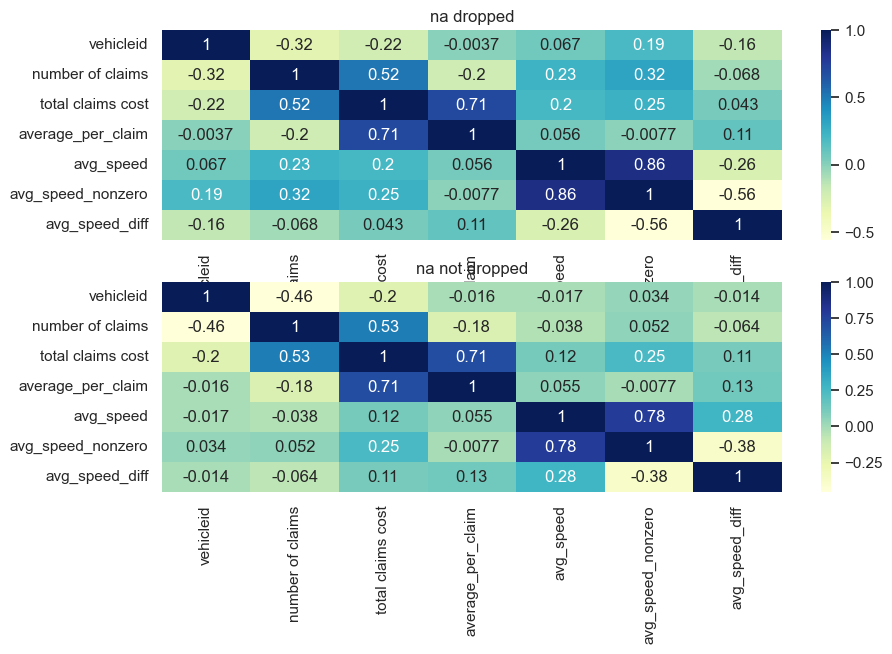

In [102]:
fig, axes = plt.subplots(2, 1)
sb.set(rc = {'figure.figsize':(10,6)})
sb.heatmap(ax = axes[0], data = data_claims.dropna().corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')
axes[0].set_title("na dropped")
sb.heatmap(ax = axes[1], data = data_claims.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')
axes[1].set_title("na not dropped")

In [ ]:
# usefull features from final data set:

# average speed ? not counting 0kms
# average difference between speed and speed limit
# average acceleration ?

# seems biggest relavant correlation is between "avg speed nonzero" and "number of claims" 


In [126]:
# remap claims amount [0,1,2,3,6] -> [0,1,2,3,4]
map = {0:0, 1:1, 2:2, 3:3, 6:3}
data_claims["number of claims"] = data_claims["number of claims"].map(map)
data_claims["number of claims"].unique()

array([nan,  3.,  2.,  1.,  0.])

In [127]:
data2 = data_claims.fillna(0)
data2.head(100).sort_values(by='number of claims', ascending=False)

,vehicleid,number of claims,total claims cost,average_per_claim,avg_speed,avg_speed_nonzero,avg_speed_diff
2,111082600,3.0,76122.98,25374.326667,18.965716,24.496400,-41.915391
1,87055861,3.0,209466.98,69822.326667,25.174561,29.669258,-34.735512
8,150986252,2.0,75401.81,37700.905000,28.982643,33.950979,-33.458403
3,96215479,2.0,56622.41,28311.205000,24.009858,31.171484,-39.678405
4,104804470,2.0,206623.44,103311.720000,21.640217,31.392984,-43.043910
...,...,...,...,...,...,...,...
47,146568941,0.0,0.00,0.000000,31.001169,36.654891,-31.676642
46,144830204,0.0,0.00,0.000000,20.265178,30.712947,-39.927576
45,144274165,0.0,0.00,0.000000,19.064399,28.232499,-40.504727
44,142360215,0.0,0.00,0.000000,24.072553,29.784776,-36.974844


In [128]:
# using a model to see actual correlation between features and target
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as Acc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X = data2.drop(['number of claims'], axis=1)
y = data2['number of claims']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)

modelXGB = xgb.XGBClassifier()
modelXGB.fit(Xtrain, ytrain)

predTXGB = modelXGB.predict(Xtrain)
trainScoreXGB = Acc(ytrain, predTXGB)

predXGB = modelXGB.predict(Xtest)
scoreXGB = Acc(ytest, predXGB)

scores = cross_val_score(modelXGB, X, y, cv=5)
scores

print("Accuracy (XGB): ", scoreXGB * 100, "%", "Train Accuracy (XGB): ", trainScoreXGB * 100, "%")
print("Cross Validation Score (XGB): ", scores.mean() * 100, "%")

modelRFC = RFC(random_state=1, n_estimators=150, max_depth=8)
modelRFC.fit(Xtrain, ytrain)

predTRFC = modelRFC.predict(Xtrain)
trainScoreRFC = Acc(ytrain, predTRFC)

predRFC = modelRFC.predict(Xtest)
scoreRFC = Acc(ytest, predRFC)

scores = cross_val_score(modelRFC, X, y, cv=5)
scores

print("Accuracy (RFC): ", scoreRFC * 100, "%", "Train Accuracy (RFC): ", trainScoreRFC * 100, "%")
print("Cross Validation Score (RFC): ", scores.mean() * 100, "%")

c:\Users\jared\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy (XGB):  90.9090909090909 % Train Accuracy (XGB):  100.0 %
Cross Validation Score (XGB):  89.04761904761905 %


c:\Users\jared\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy (RFC):  93.93939393939394 % Train Accuracy (RFC):  100.0 %
Cross Validation Score (RFC):  89.04761904761905 %
